In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns


Epoch 1/50
92/92 [==============================] - 1s 6ms/step - loss: 24.3682 - accuracy: 0.5171 - val_loss: 21.5018 - val_accuracy: 0.5287
Epoch 2/50
92/92 [==============================] - 0s 4ms/step - loss: 8.2731 - accuracy: 0.5455 - val_loss: 6.6907 - val_accuracy: 0.4973
Epoch 3/50
92/92 [==============================] - 1s 5ms/step - loss: 5.0753 - accuracy: 0.5571 - val_loss: 4.5274 - val_accuracy: 0.5027
Epoch 4/50
92/92 [==============================] - 1s 7ms/step - loss: 2.7832 - accuracy: 0.5926 - val_loss: 4.0519 - val_accuracy: 0.5068
Epoch 5/50
92/92 [==============================] - 1s 7ms/step - loss: 3.0487 - accuracy: 0.5892 - val_loss: 1.2335 - val_accuracy: 0.6352
Epoch 6/50
92/92 [==============================] - 1s 7ms/step - loss: 4.3747 - accuracy: 0.5793 - val_loss: 1.5857 - val_accuracy: 0.6107
Epoch 7/50
92/92 [==============================] - 0s 5ms/step - loss: 5.0624 - accuracy: 0.5766 - val_loss: 1.3824 - val_accuracy: 0.6284
Epoch 8/50
92/92 [

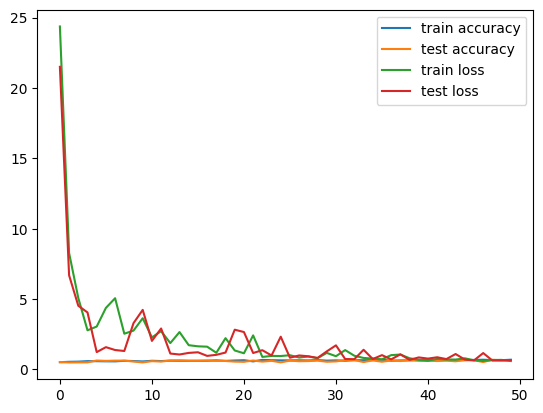

23/23 [==============================] - 0s 2ms/step


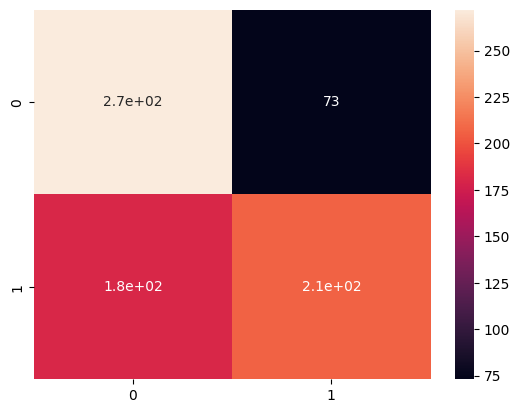

In [ ]:

# CSV dosyasını yükle
data = pd.read_csv('dengeli_ses_oznitelikleri_ve_etiketleri.csv')
X = data.drop(['Dosya Adı', 'Etiket'], axis=1).values
y = data['Etiket'].values

# Etiketleri sayısal değerlere dönüştür
encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(y)
dummy_y = to_categorical(encoded_Y)

# Eğitim ve test kümelerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.2, random_state=42)

# Modeli tanımla
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

# Modeli derle
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Modeli eğit
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=1)

# Eğitim ve test kaybını ve doğruluğunu çiz
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

# Karşıtlık matrisini hesapla ve göster
predictions = model.predict(X_test)
matrix = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
sns.heatmap(matrix, annot=True)

# Model ağırlıklarını kaydet
model.save_weights('model_weights.h5')


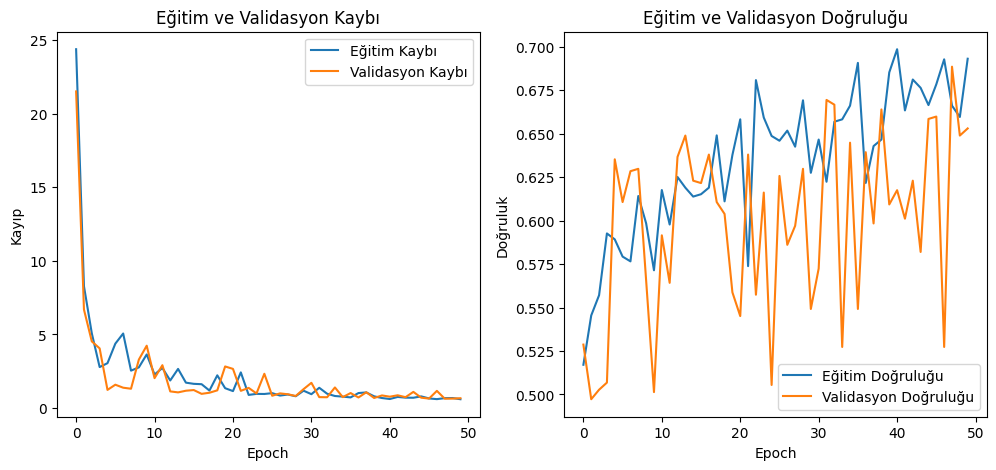

23/23 [==============================] - 0s 2ms/step


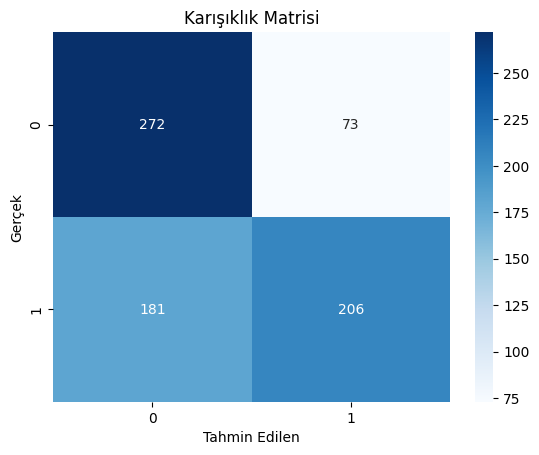

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

# Eğitim ve validasyon kaybını ve doğruluğunu görselleştir
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Validasyon Kaybı')
plt.title('Eğitim ve Validasyon Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Validasyon Doğruluğu')
plt.title('Eğitim ve Validasyon Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Karışıklık matrisini hesapla ve görselleştir
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()

# Model ağırlıklarını kaydet
model.save('Multilayer_Perceptron.h5')